### Week9 analysis (MSD & RDF)

In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
topology = "../Data/equil/kalj_T2_n360_v300_10000_1.lammpstrj"

In [3]:
trajectory_files = glob.glob(r"../Data/prod/*.dcd")
for file in trajectory_files:
    print(file)

../Data/prod/kalj_T1000_n360_v300_prod_50000_1.unwrap.dcd
../Data/prod/kalj_T0650_n360_v300_prod_350000_1.unwrap.dcd
../Data/prod/kalj_T1500_n360_v300_prod_10000_1.unwrap.dcd
../Data/prod/kalj_T0900_n360_v300_prod_150000_1.unwrap.dcd
../Data/prod/kalj_T0600_n360_v300_prod_1000000_1.unwrap.dcd
../Data/prod/kalj_T0800_n360_v300_prod_150000_1.unwrap.dcd
../Data/prod/kalj_T0475_n360_v300_prod_30000000_1.unwrap.dcd
../Data/prod/kalj_T0500_n360_v300_prod_10000000_1.unwrap.dcd
../Data/prod/kalj_T0550_n360_v300_prod_3000000_1.unwrap.dcd
../Data/prod/kalj_T0700_n360_v300_prod_180000_1.unwrap.dcd


In [4]:
trajs = {}
T = ['1000', '0650', '1500', '0900', '0600', '0800', '0475', '0500', '0550', '0700']
i = 0
for file in trajectory_files:
    trajs["traj_T{0}".format(T[i])] = mda.Universe(topology, file, topology_format='LAMMPSDUMP')
    i += 1

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


#### Part 1. Compute the rdf between type 1 and type 1, type 2 and type 2, type 1 and type 2, make 3 figures. 

In [5]:
traj_list = [trajs['traj_T0475'], trajs['traj_T0500'], trajs['traj_T0550'], trajs['traj_T0600'], trajs['traj_T0650'],  trajs['traj_T0700'], trajs['traj_T0800'], trajs['traj_T0900'], trajs['traj_T1000'], trajs['traj_T1500']]
# Type 1 and Tpye 1
rdf_11 = np.empty(10, dtype='object')
# Type 2 and Tpye 2
rdf_22 = np.empty(10, dtype='object')
# Type 1 and Tpye 2
rdf_12 = np.empty(10, dtype='object')

for traj in traj_list:
    sel1 = traj.select_atoms("type 1")
    sel2 = traj.select_atoms("type 2")
    rdf_11[traj_list.index(traj)] = rdf.InterRDF(sel1, sel1, nbins=100, range=(0, 10))
    rdf_11[traj_list.index(traj)].run()
    rdf_22[traj_list.index(traj)] = rdf.InterRDF(sel2, sel2, nbins=100, range=(0, 10))
    rdf_22[traj_list.index(traj)].run()
    rdf_12[traj_list.index(traj)] = rdf.InterRDF(sel1, sel2, nbins=100, range=(0, 10))
    rdf_12[traj_list.index(traj)].run()

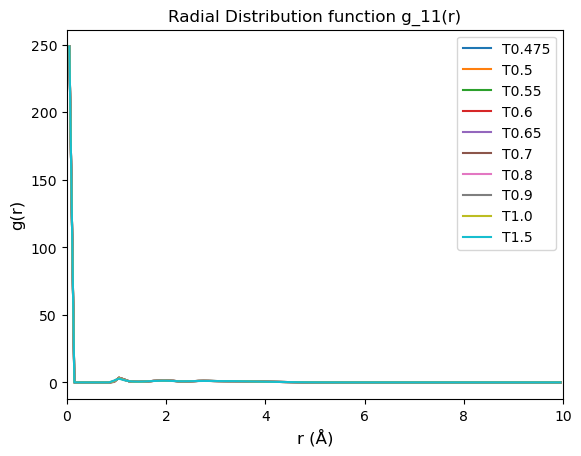

In [6]:
i = 0
Temp = ['0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']
plt.figure()

while i < 10:
    plt.plot(rdf_11[i].results.bins, rdf_11[i].results.rdf, label ='T'+Temp[i])
    i += 1
    
plt.xlim(0, 10)
plt.title('Radial Distribution function g_11(r)')
plt.legend()
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.savefig('Radial_Distribution_function_g_11(r).png')
plt.show()

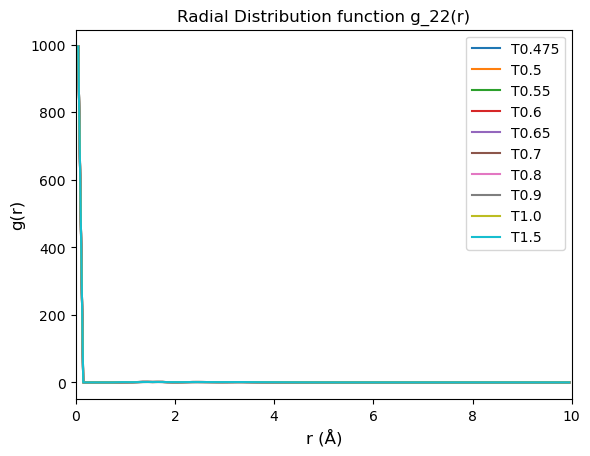

In [7]:
i = 0
Temp = ['0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']
plt.figure()

while i < 10:
    plt.plot(rdf_22[i].results.bins, rdf_22[i].results.rdf, label ='T'+Temp[i])
    i += 1
    
plt.xlim(0, 10)
plt.title('Radial Distribution function g_22(r)')
plt.legend()
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.savefig('Radial_Distribution_function_g_22(r).png')
plt.show()

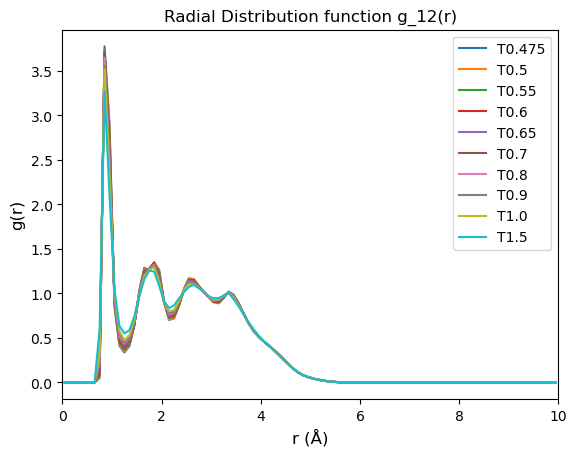

In [8]:
i = 0
Temp = ['0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']
plt.figure()

while i < 10:
    plt.plot(rdf_12[i].results.bins, rdf_12[i].results.rdf, label ='T'+Temp[i])
    i += 1
    
plt.xlim(0, 10)
plt.title('Radial Distribution function g_12(r)')
plt.legend()
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.savefig('Radial_Distribution_function_g_12(r).png')
plt.show()

#### Part 2. Compute the msd for type 1 particles at each temperature.

In [28]:
selection = 'type 1'

msds = np.empty(10, dtype=object)
for traj in traj_list:
    print(traj)
    msds[traj_list.index(traj)] = msd.EinsteinMSD(traj, select=selection, msd_type='xyz', fft=False)
    msds[traj_list.index(traj)].run()

<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>
<Universe with 360 atoms>


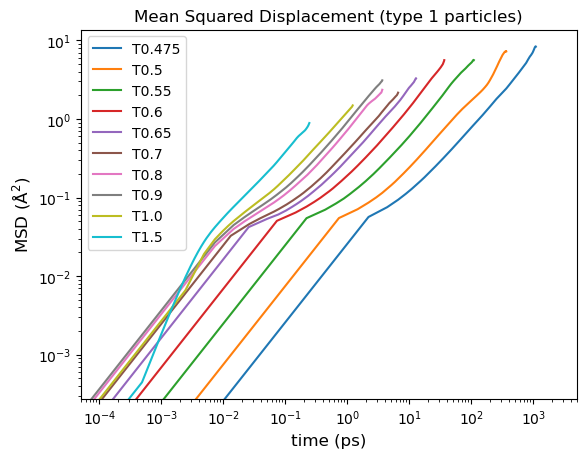

In [10]:
i = 0
Temp = ['0.475', '0.5', '0.55', '0.6', '0.65', '0.7', '0.8', '0.9', '1.0', '1.5']
plt.figure()

while i < 10:
    plt.loglog(msds[i].times, msds[i].results.timeseries, label ='T'+Temp[i])
    i += 1
    
plt.xlim(0.00005, 5000)
plt.title('Mean Squared Displacement (type 1 particles)')
plt.legend()
plt.xlabel('time (ps)', fontsize=12)
plt.ylabel('MSD (Å$^2$)', fontsize=12)
plt.savefig('Mean_Squared_Displacement_type#1_particles.png')
plt.show()

#### Part 3. Find the time where MSD = 1 at each temperature.

In [23]:
print((msds[9].times[1]))

0.0004888821232206538


In [48]:
diffusion_time = []

i = 0
while i < 10:
    index = np.where(msds[i].results.timeseries > 1)
    index = list(index[0])
    print(index[:1])
    diffusion_time.append(index[:1])
    i += 1

diffusion_time[9] = [-1]

print(type(diffusion_time))

diffusion_time = sum(diffusion_time, [])

diffusion_time.remove(-1)

print(diffusion_time)

[61]
[69]
[79]
[98]
[149]
[223]
[192]
[151]
[325]
[]
<class 'list'>
[61, 69, 79, 98, 149, 223, 192, 151, 325]


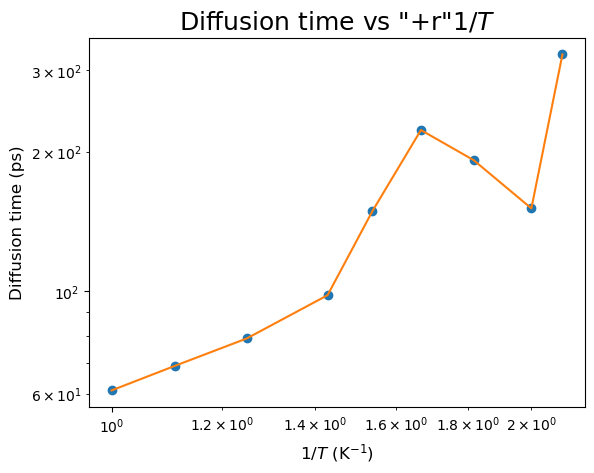

In [55]:
Temp = ['1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
plt.figure()
plt.loglog(1/np.array(Temp, dtype=float), diffusion_time,'o')
plt.loglog(1/np.array(Temp, dtype=float), diffusion_time)
plt.xlabel(r'$1/T$ (K$^{-1}$)', fontsize = 12)
plt.ylabel('Diffusion time (ps)', fontsize = 12)
plt.title('Diffusion time vs "+r"$1/T$', fontsize = 18)
plt.savefig('diffusion_time_vs_1_over_T.png')
plt.show()